In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# plt.rcParams["figure.figsize"] = [1, 5]
plt.rcParams["figure.dpi"] = 100
plt.style.use('seaborn-notebook')
sns.set_style("ticks")
sns.despine(offset=10, trim=True)
from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')
from time import sleep

from math import sqrt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GRU
from keras.models import load_model
from keras.callbacks import Callback

import ccxt
import exchange_poloniex as expx

Using TensorFlow backend.


In [2]:
class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();

plot_learning = PlotLearning()

In [27]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        print(cols, names)
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def series_to_supervised_v2(df, n_in=1, n_out=1, dropnan=True):
    for i in len(dfw)

In [28]:
def transform_diff(vals):
    d = []
    o = vals[0]
    for n in vals[1:]:
        d += [np.float32((o-n)/n)]
        o = n
    return np.asarray(d)

def transform_classification(vals):
    d = []
    
    extreme = 0.05
    major = 0.03
    high = 0.01
    minor = 0.001
    
    for n in vals:
#         print(n)
        if n >= extreme:
            d += [4]
        elif n >= major:
            d += [3]
        elif n >= high:
            d += [2]
        elif n >= minor:
            d += [1]
        elif n >= -minor:
            d += [0]
        elif n >= -high:
            d += [-1]
        elif n >= -major:
            d += [-2]
        elif n >= -extreme:
            d += [-3]
        else:
            d += [-4]
    return d

In [30]:
# save new data
# expx.save_df(days_back = 90)
            
# load dataset
dataset = expx.load_df()[['open']][:16]
# print(dataset)
values = dataset.values.astype('float32')
# values = transform_diff(values)
# values = transform_classification(values)

# specify the number of lag hours
n_timesteps_in = 12*1
n_timesteps_out = 3

# frame as supervised learning
reframed = series_to_supervised(data = values, n_in = n_timesteps_in, n_out = n_timesteps_out)

print(reframed.shape)
reframed.head()

[          0
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12  10331.0
13  10267.0
14  10267.0
15  10444.0] ['var1(t-12)']
[          0
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12  10331.0
13  10267.0
14  10267.0
15  10444.0,           0
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11  10331.0
12  10267.0
13  10267.0
14  10444.0
15  10340.0] ['var1(t-12)', 'var1(t-11)']
[          0
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12  10331.0
13  10267.0
14  10267.0
15  10444.0,           0
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
1

,var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t),var1(t+1),var1(t+2)
12,10331.0,10267.0,10267.0,10444.0,10340.0,10338.0,10340.0,10338.0,10338.0,10338.0,10338.0,10339.0,10338.0,10339.0,10388.0
13,10267.0,10267.0,10444.0,10340.0,10338.0,10340.0,10338.0,10338.0,10338.0,10338.0,10339.0,10338.0,10339.0,10388.0,10450.0


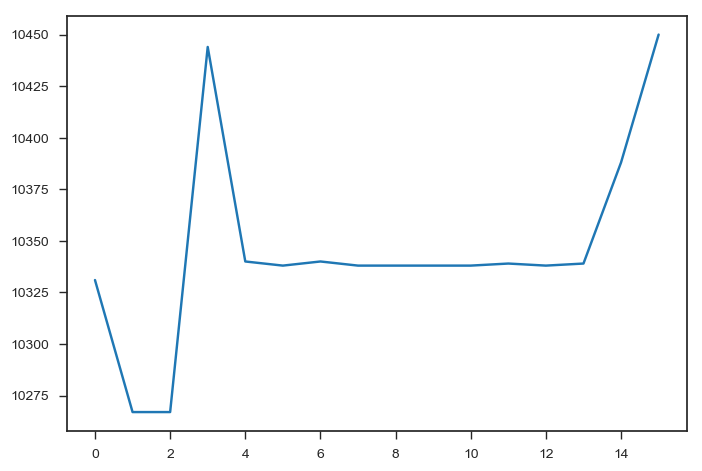

In [26]:
plt.plot(values)

In [7]:
# split into train and test sets
values = reframed.values
tts = int(len(values) * 0.7)
train = values[:tts, :]
test = values[tts:, :]
# split into input and outputs
n_features = int(reframed.shape[1]/(n_timesteps_in+1))
n_obs = n_timesteps_in * n_features
n_prd = reframed.shape[1] - n_obs
train_X, train_y = train[:, :n_obs], train[:, -n_prd:]
test_X, test_y = test[:, :n_obs], test[:, -n_prd:]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_timesteps_in, n_features))
# train_y = train_y.reshape((train_y.shape[0], n_timesteps_out, n_features))
test_X = test_X.reshape((test_X.shape[0], n_timesteps_in, n_features))
# test_y = test_y.reshape((test_y.shape[0], n_timesteps_out, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(18132, 12) 18132 (18132, 3)
(18132, 12, 1) (18132, 3) (7772, 12, 1) (7772, 3)


In [8]:
from keras import callbacks
from keras.wrappers.scikit_learn import KerasClassifier

def create_network(num_gru_units, num_gru_layers, gru_activation, num_dense_units, num_dense_layers, dense_activation, dense_dropout, output_activation):
#     early_stopping_monitor = callbacks.EarlyStopping(patience=2)

    # design network
    model = Sequential()
    # model.add(Dense(64, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(GRU(num_gru_units, input_shape=(train_X.shape[1], train_X.shape[2]), activation=gru_activation, return_sequences=True))
    for x in range(num_gru_layers):
        model.add(GRU(num_gru_units, activation=gru_activation, return_sequences=True))  # returns a sequence of vectors of dimension 32
    model.add(GRU(num_gru_units, activation=gru_activation))  # return a single vector of dimension 32
    for x in range(num_dense_layers):
        model.add(Dense(num_dense_units, activation=dense_activation))
        model.add(Dropout(dense_dropout))
    model.add(Dense(output_dim = train_y.shape[1], activation = output_activation)) #Output layer
    model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['accuracy'])
    return model

neural_network = KerasClassifier(build_fn=create_network, epochs=20, batch_size=4096, verbose=2)

In [9]:
hyperparameters = {
    'num_gru_units': [16],
    'num_gru_layers': [1],
    'gru_activation': ['relu'],
    'num_dense_units': [16],
    'num_dense_layers': [1],
    'dense_activation': ['relu'],
    'dense_dropout': [0.0, 0.001, 0.01, 0.1],
    'output_activation': ['relu']
}

# fit_parameters = {
#     'validation_data': [(test_X, test_y)],
#     'batch_size': [1024],
#     'epochs': [1000]
# }

t = 0
for k, v in hyperparameters.items():
    t = t * len(v)
    if t == 0:
        t = len(v)
print(t)

4


In [10]:
# from sklearn.model_selection import GridSearchCV

# # Create grid search
# grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters, verbose=50, cv=2, n_jobs=1)

# # Fit grid search
# grid_result = grid.fit(X=train_X, y=train_y)

In [11]:
# grid_result.best_params_

In [12]:
import shutil, os
directory = 'logs'
if os.path.exists(directory):
    shutil.rmtree(directory)
if not os.path.exists(directory):
    os.makedirs(directory)

In [13]:
model = create_network(num_gru_units = 16, num_gru_layers = 6, gru_activation = 'relu', num_dense_units = 4, num_dense_layers = 1, dense_activation = 'relu', dense_dropout = 0.001, output_activation = 'relu')
tbcallback = callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None)

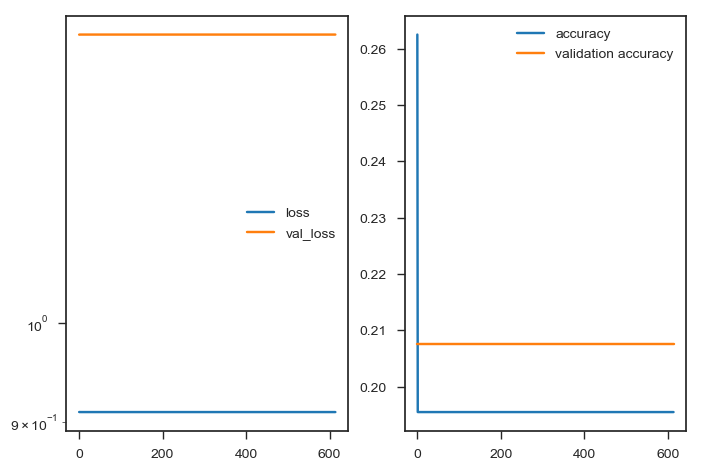

18132/18132 [==============================] - 2s 93us/step - loss: 0.9094 - acc: 0.1955 - val_loss: 1.3605 - val_acc: 0.2075
Epoch 616/1000
 5120/18132 [=======>......................] - ETA: 0s - loss: 0.8065 - acc: 0.1865

KeyboardInterrupt: 

In [14]:
# fit network
model.fit(train_X, train_y, epochs=1000, batch_size=1024, validation_data=(test_X, test_y), verbose=1, shuffle=False, callbacks=[plot_learning, tbcallback])

In [29]:
# model.save('model_attempt4.h5')

In [30]:
model.evaluate(x=test_X, y=test_y)

7772/7772 [==============================] - 5s 644us/step


[1.3603105241959081, 0.47555326815738669]

In [31]:
def predict(df, points):
    before = df[:, 0, -1].flatten()
    plt.plot(before, label='before')
    for point in points:
        after = model.predict(df[:point])[-1]
        padding = [None for p in range(point+1)]
        plt.plot(np.concatenate([padding, after]), label='after')
    plt.legend()
    plt.show() 

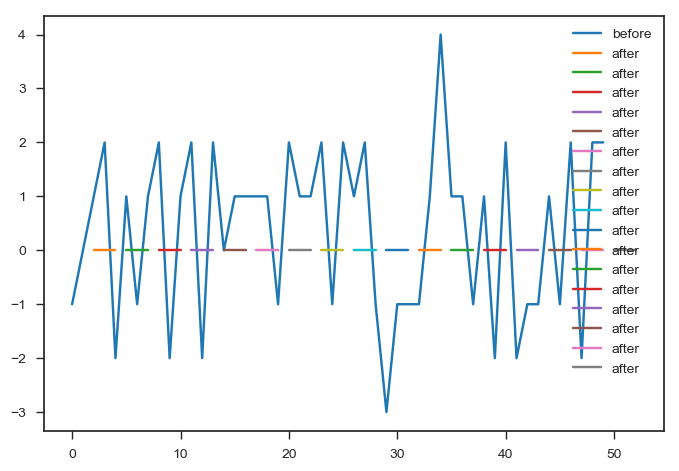

In [32]:
# print(test_X.shape)
# print(test_X[:1].shape)
predict(test_X[0:50], range(1, 50, 3))

temp [[[ 1.]
  [ 2.]
  [-2.]
  [ 2.]
  [ 0.]
  [ 1.]
  [ 1.]
  [ 1.]
  [ 1.]
  [-1.]
  [ 2.]
  [ 1.]]]
test_y[5:6] [[ 1.  2. -1.]]
aaa [[ 0.  0.  0.]]
[None, None, None, None, None, None, None, None, None, None, None, None]


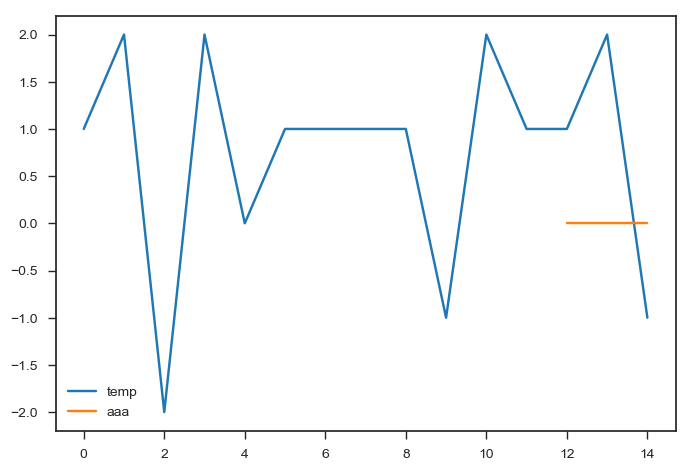

In [33]:
temp = test_X[10:11]
print('temp', temp)
print('test_y[5:6]', test_y[10:11])
aaa = model.predict(temp)
print('aaa', aaa)
padding = [None for p in range(len(temp.flatten()))]
print(padding)
plt.plot(np.concatenate([temp.flatten(), test_y[10:11].flatten()]), label='temp')
plt.plot(np.concatenate([padding, aaa[0]]), label='aaa')
plt.legend()
plt.show() 